In [38]:
from warnings import filterwarnings
filterwarnings('ignore')

# IRIS PROJRCT DEployment

## data gathering

In [39]:
import pandas as pd
df=pd.read_csv('Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species'>

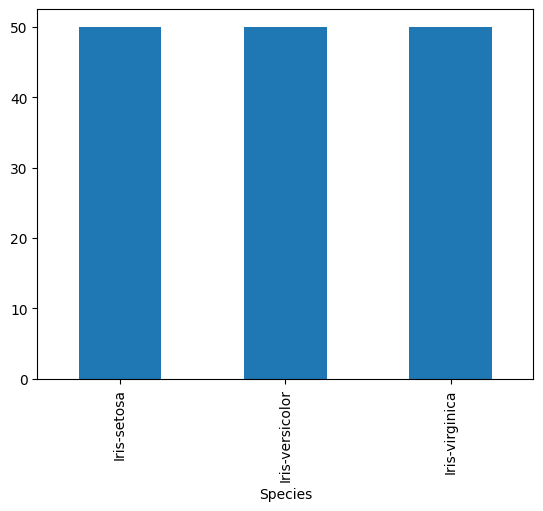

In [43]:
df['Species'].value_counts().plot(kind='bar')

# define x and y

In [44]:
x=df.drop(['Species','Id'],axis=1)
y=df['Species']

## Preprocessing

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [46]:
num_pipe=Pipeline(steps=[('Scaler',StandardScaler()),('impute',SimpleImputer())])

In [47]:
x1=pd.DataFrame(num_pipe.fit_transform(x),columns=num_pipe.get_feature_names_out())

In [48]:
x1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [49]:
cols=num_pipe.get_feature_names_out()
cols

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [50]:
import pickle
with open('pipe.pkl','wb') as file:
    pickle.dump(num_pipe,file)

In [51]:
le=LabelEncoder()

In [52]:
y1=le.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
import pickle
with open('le.pkl','wb') as file:
    pickle.dump(le,file)

## split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=21)

# Model 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [56]:
kn=KNeighborsClassifier()

In [57]:
grid={
    'n_neighbors':[2,3,4,5,6,7,8]
    }

In [58]:
gs=GridSearchCV(kn,param_grid=grid,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]})

In [59]:
gs.best_params_

{'n_neighbors': 7}

In [60]:
best_knn=gs.best_estimator_

In [61]:
best_knn

KNeighborsClassifier(n_neighbors=7)

In [62]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(best_knn,file)

# Evaluation

In [63]:
from sklearn.metrics import multilabel_confusion_matrix,classification_report,accuracy_score

In [64]:
y_pred=best_knn.predict(x_test)

acc=accuracy_score(y_pred,y_test)
print('Accuracy:',acc)

cnf=multilabel_confusion_matrix(y_pred,y_test)
print('Confusion_matrix:\n',cnf)

clf=classification_report(y_pred,y_test)
print('Classification_reports:\n',clf)

Accuracy: 0.9
Confusion_matrix:
 [[[19  0]
  [ 0 11]]

 [[17  2]
  [ 1 10]]

 [[21  1]
  [ 2  6]]]
Classification_reports:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.91      0.87        11
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



## Predicting Final Results

In [67]:
def predict_data(le,num_pipe,model):
    sepal_length=float(input('Enter the value of sepal_length:'))
    sepal_width=float(input('Enter the value of sepal_width:'))
    petal_length=float(input('Enter the value of petal_length:'))
    petal_width=float(input('Enter the value Of petal_width:'))

    x_new=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    x_new.columns= num_pipe.get_feature_names_out()
    print('DataFrame before preprocessing:\n',x_new)
    display(x_new)

    #x_new=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    #x_new.columns = num_pipe.get_feature_names_out()

    x_pre=num_pipe.transform(x_new)
    x_pre=pd.DataFrame(x_pre,columns=x_new.columns)
    print('After preprocessing:\n',x_pre)
    display(x_pre)

     

    y_pred1=model.predict(x_pre)
    label=le.inverse_transform(y_pred1)[0]

    prob=model.predict_proba(x_pre).max()

    print('Prediction:',label)
    print('Probablity:',prob)

    return label,prob

In [68]:
predict_data(le,num_pipe,best_knn)

DataFrame before preprocessing:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            1.0           1.0            2.0           6.0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,1.0,2.0,6.0


After preprocessing:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -5.868564     -4.753017      -1.000078      6.312456


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-5.868564,-4.753017,-1.000078,6.312456


Prediction: Iris-versicolor
Probablity: 0.5714285714285714


('Iris-versicolor', 0.5714285714285714)